<a href="https://colab.research.google.com/github/npuneeth/York_Univ_ML/blob/main/Disaster_Tweets_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DISASTER TWEETS PREDICTION - FINAL ASSIGNMENT** 
## *A Semi-Supervised Approach* 
**CSML-1000 | By GROUP 3** (*Jean-Jacques Rousseau, David Geller, Kwangjin Park, Petr Kocourek and Puneeth Nagarajaiah*)


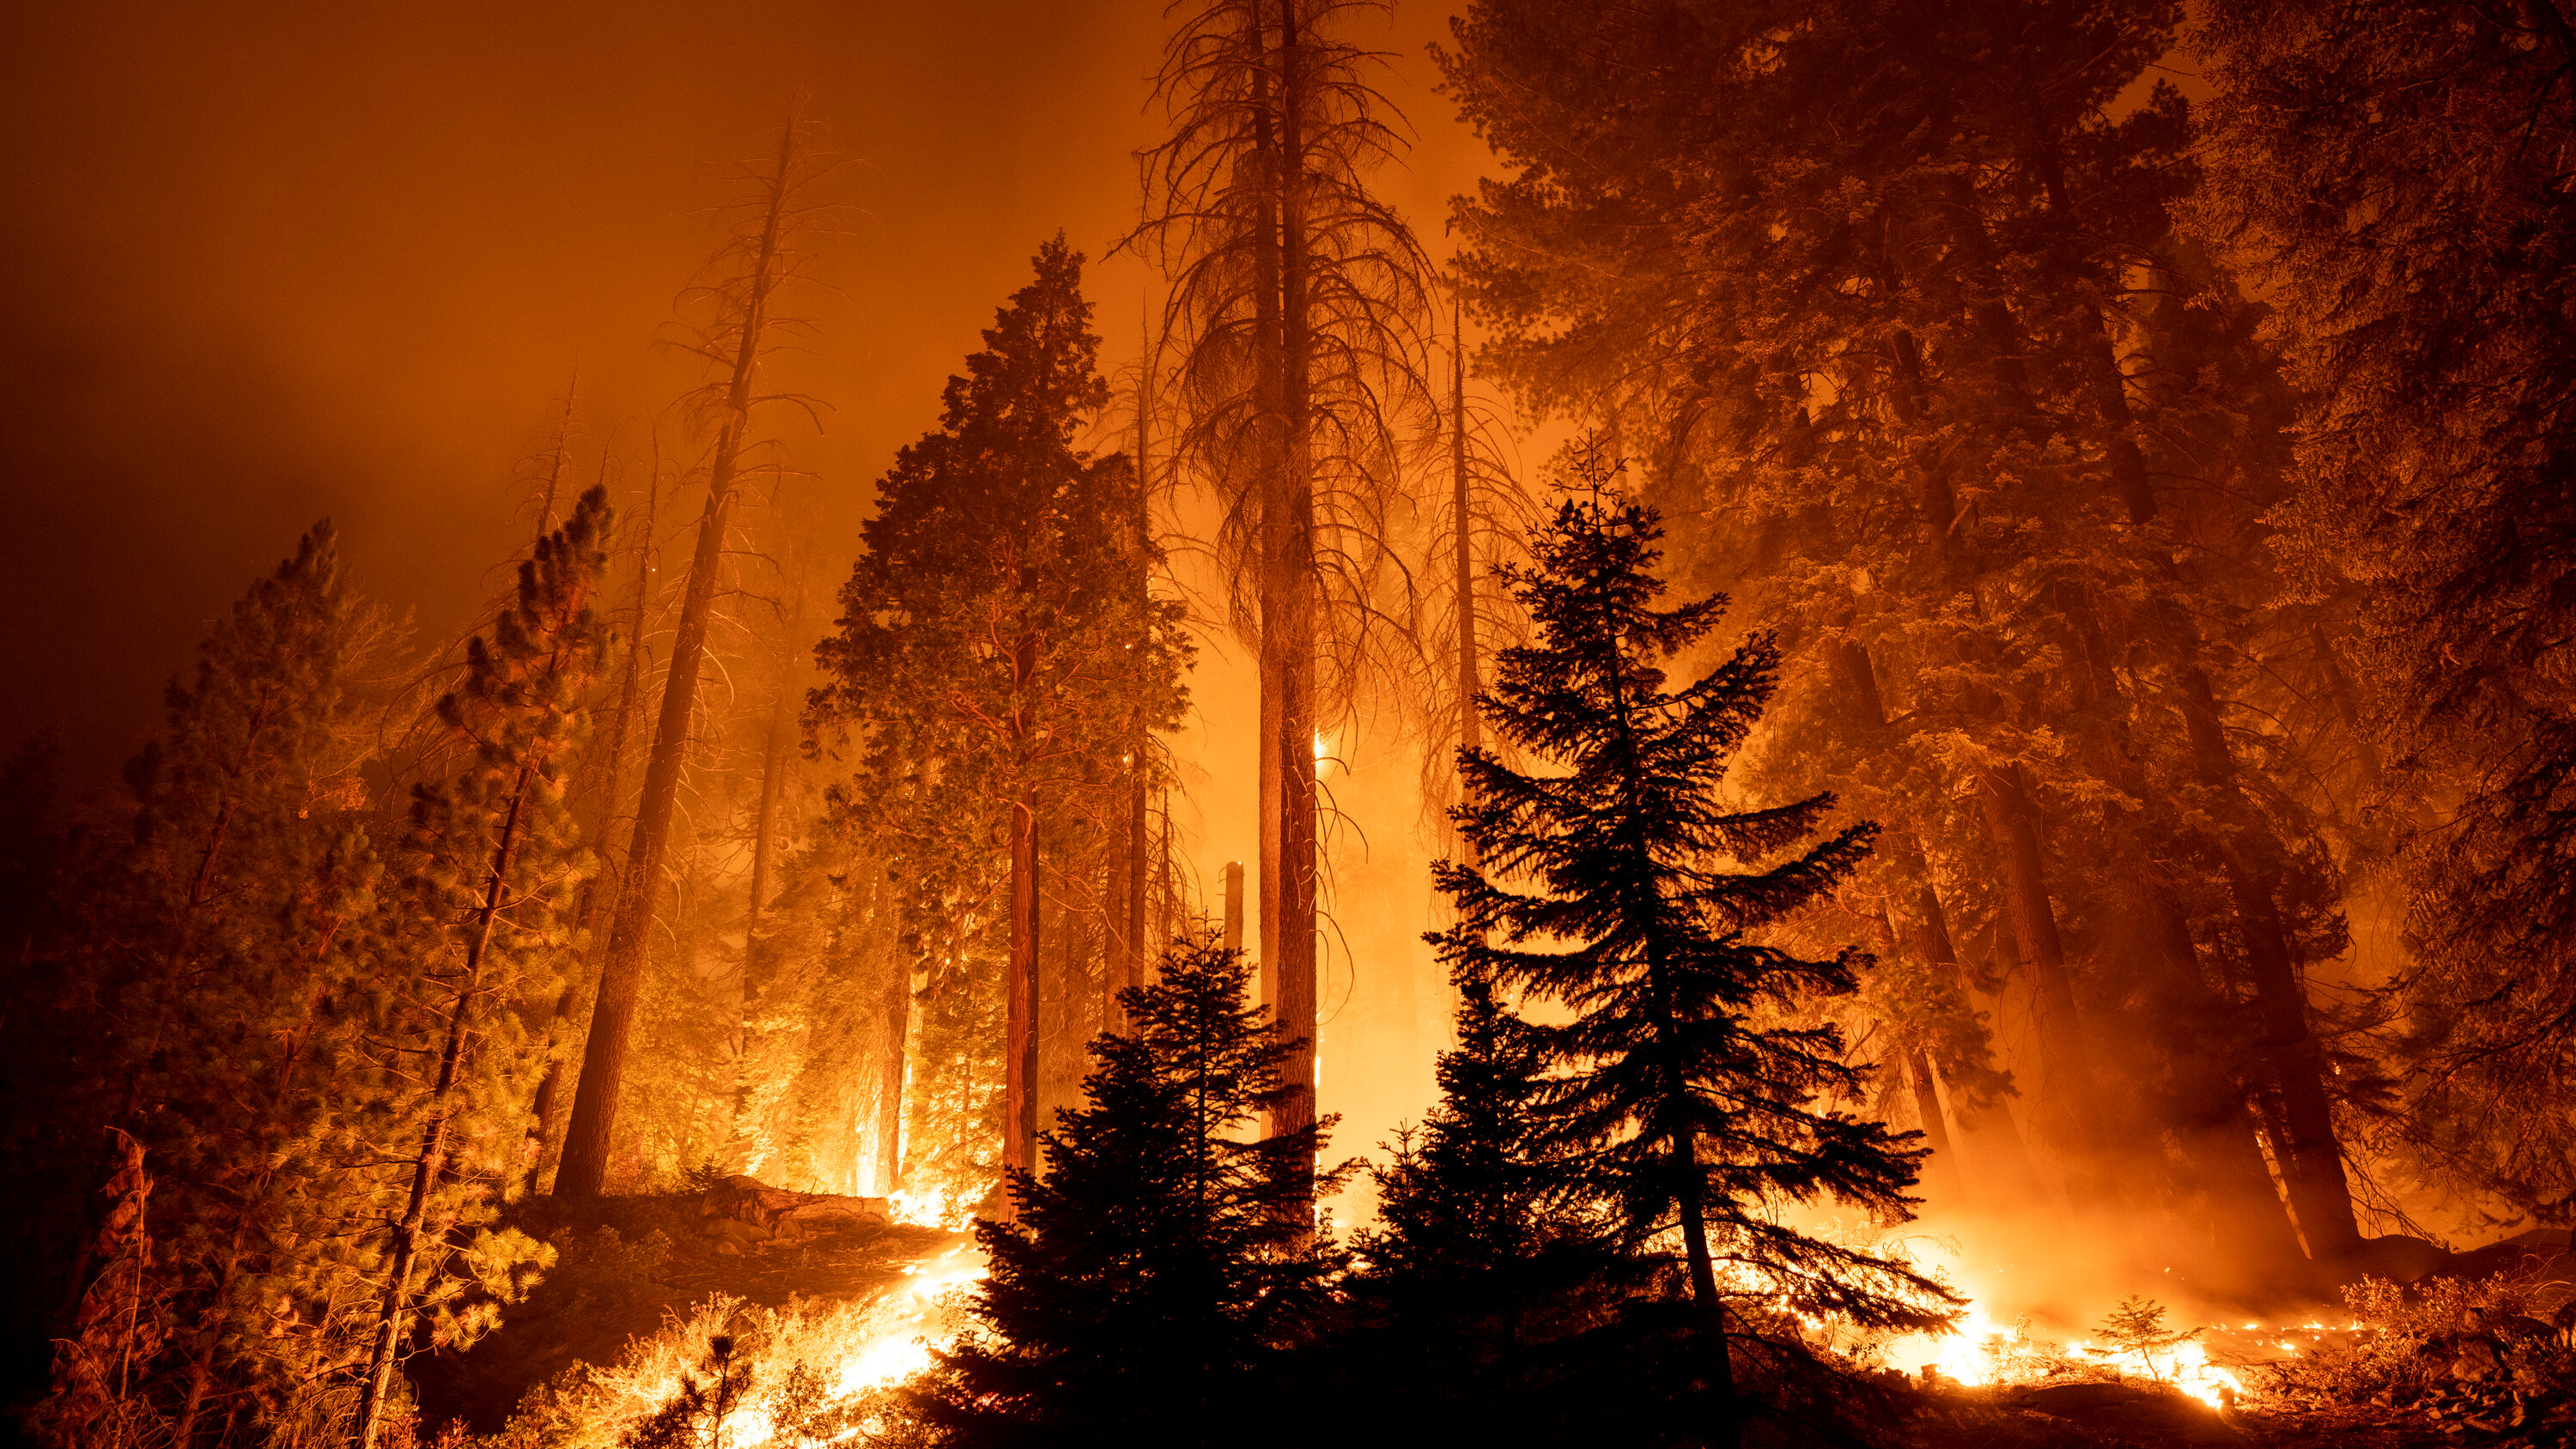

In Canada every year, over 12 million calls are made to 911 (https://www.theglobeandmail.com/technology/canadas-9-1-1-emergency/article560927/). What if some of these calls are occurring at the same time, where there are not enough emergency personnel to respond to all of them at once? How to tell which calls are more urgent than others? What if there are some ways that victims could tweet something and the emergency response can occur right away based on text analysis of the tweet?

Also by the end of 2021, total of 8835 wild fires were recorded in California, alone (https://en.wikipedia.org/wiki/2021_California_wildfires). People have very little time to evacuate and save themselves from fire. What would be the fastest way to reach these victims and evacuate them from the site?

We think Natural Language Process (NLP) can help with identfying emergency response situations from non-emergency situations. Nowadays, NLP in machine learning is used for sentiment analysis, which helps the machine to identify the mood or opinions within large amounts of text, document summarization, transforming voice commands into written text, and also automatic translation.

The dataset is from the Kaggle competition. We are predicting whether a given tweet is about a real disaster or not. If so, predict a 1. If not, predict a 0 (https://www.kaggle.com/competitions/nlp-getting-started/data).


###Table of Contents
1. Setting Up
2. Data Analysis
3. Model Analysis
4. Conclusion
5. References



##1. Setting **up**

In this section, we are installing all requirments and downloading the dataset from Kaggle website. We have two sets of data, which are training_data and test_data. 

Tweets in the data needs to be pre-processed to transform the raw text into a format that machine learning algorithms can learn from. 

In [ ]:
! pip install pycaret==2.3.5
! pip install pandas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set_theme()
! pip install Kaggle
! mkdir ~/.kaggle

In [ ]:
!pip install -U pip setuptools wheel
!pip install spacy
!python -m spacy download en_core_web_sm

In [ ]:
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle competitions download -c nlp-getting-started --force
! unzip nlp-getting-started.zip


In [ ]:
training_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [ ]:
training_data.shape

(7613, 5)

In [ ]:
training_data.drop("id", axis=1, inplace=True)
training_data.shape

(7613, 4)

In [ ]:
test_data.shape

(3263, 4)

In [ ]:
test_data.drop("id", axis=1, inplace=True)
test_data.shape

(3263, 3)

In [ ]:
test_data.head()

keyword location                                               text
0     NaN      NaN                 Just happened a terrible car crash
1     NaN      NaN  Heard about #earthquake is different cities, s...
2     NaN      NaN  there is a forest fire at spot pond, geese are...
3     NaN      NaN           Apocalypse lighting. #Spokane #wildfires
4     NaN      NaN      Typhoon Soudelor kills 28 in China and Taiwan

Text pre-processing of our dataset can be done simply by using `setup()` function of pycaret. The following pre-processing are done automatically (with examples):

1. Removing numeric characters - 1, 2, 3, etc
2. Removing special charactiers - %, $, @, etc
3. Word Tokenization - a **boy** was in an **accident**
4. Stopword Removal - the, at, in, a, etc
5. Bigram Extraction - forest_fire, deadly_tornado, etc
6. Trigram Extraction - deadly_club_shooting, 
7. Lemmatizing - killing, killed, kill

After setting up, you see that there are total 7613 tweets that have been processed and it created 10175 vocabularies from pre-processing

##2. Data **Analysis**

For our assignment, we will be using data from Kaggle Competition (https://www.kaggle.com/competitions/nlp-getting-started/data?select=train.csv). The training dataset contains 7613 samples. Short description of features are below:

- **id:** numeric value assigned to each row of samples
- **keyword:** one word that could describe the tweet 
- **location:** physical location where the tweet originated
- **text:** Tweet made by people
- **target:** status of disaster (1-disaster, 0-not disater)



In [ ]:
# Let's take a look at train dataframe
training_data.head(10)

keyword location                                               text  target
0     NaN      NaN  Our Deeds are the Reason of this #earthquake M...       1
1     NaN      NaN             Forest fire near La Ronge Sask. Canada       1
2     NaN      NaN  All residents asked to 'shelter in place' are ...       1
3     NaN      NaN  13,000 people receive #wildfires evacuation or...       1
4     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...       1
5     NaN      NaN  #RockyFire Update => California Hwy. 20 closed...       1
6     NaN      NaN  #flood #disaster Heavy rain causes flash flood...       1
7     NaN      NaN  I'm on top of the hill and I can see a fire in...       1
8     NaN      NaN  There's an emergency evacuation happening now ...       1
9     NaN      NaN  I'm afraid that the tornado is coming to our a...       1

In [ ]:
# Printing the first few tweets
print(training_data['text'][:5])

0    Our Deeds are the Reason of this #earthquake M...
1               Forest fire near La Ronge Sask. Canada
2    All residents asked to 'shelter in place' are ...
3    13,000 people receive #wildfires evacuation or...
4    Just got sent this photo from Ruby #Alaska as ...
Name: text, dtype: object


In [ ]:
# Counting missing values
training_data.isnull().sum()

print("We can see that many locations are missing.")

We can see that many locations are missing.


### Analysis of Train Data

In [ ]:
training_data.shape

(7613, 4)

In [ ]:
df_eda = training_data.copy()

##### Feature: Keywords

In [ ]:
df_eda = training_data.copy()

In [ ]:
a = df_eda['keyword'].isna().sum()
aa = df_eda['keyword'].count()
print("There is " + str(a) + " nan  and " + str(aa) + " non nan values for values for keywords")

There is 61 nan  and 7552 non nan values for values for keywords


In [ ]:
#number of unique words
a = df_eda['keyword'].nunique()
a = str(a)
print("There are " + a + " unique keywords")

There are 221 unique keywords


We can see that most of the key words are disaster related hence we cannot follow distribution of mere keywords to evaluate the tweets.


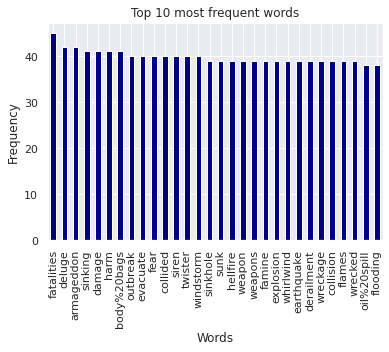

In [ ]:
# Top 30 most frequent keywords
df_k = df_eda['keyword']
ax = df_k.value_counts()[:30].plot(kind = 'bar', y = 'Frequencies', title = 'Top 10 most frequent words', colormap='jet')

ax.set_xlabel("Words")
ax.set_ylabel("Frequency")

print("We can see that most of the key words are disaster related hence we cannot follow distribution of mere keywords to evaluate the tweets.")


We can see quite even frequency of keywords distribtuion


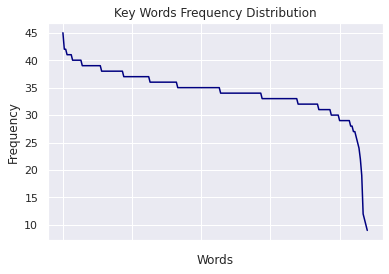

In [ ]:
# Frequency of keywords
df_k = df_eda['keyword']
ax = df_k.value_counts().plot(kind = 'line', y = 'Frequencies', title = 'Key Words Frequency Distribution', colormap='jet')


ax.set_ylabel("Frequency")
ax.set_xlabel("Words")
ax.xaxis.set_major_formatter(plt.NullFormatter())

print("We can see quite even frequency of keywords distribtuion")

##### Feature: Location

In [ ]:
#cleaning data
df_loc = training_data.copy()
df_eda.loc[df_loc['location'] == 'USA', 'location'] = 'United States'
df_eda.loc[df_loc['location'] == 'NY', 'location'] = ' New York'
df_eda.loc[df_loc['location'] == 'UK', 'location'] = 'United Kingdom '
df_eda.loc[df_loc['location'] == 'California, USA', 'location'] = 'California'
df_eda.loc[df_loc['location'] == 'New York, NY', 'location'] = 'New York'
df_eda.loc[df_loc['location'] == 'Los Angeles, CA', 'location'] = 'Los Angeles'
df_eda.loc[df_loc['location'] == 'United Kingdom', 'location'] = 'United Kingdom '
df_eda.loc[df_loc['location'] == 'Washington, D.C.', 'location'] = 'Washington, DC'
df_eda.loc[df_loc['location'] == 'Washington, D.C. ', 'location'] = 'Washington, DC'
df_eda.loc[df_loc['location'] == 'Washington', 'location'] = 'Washington, DC'
df_eda.loc[df_loc['location'] == 'London', 'location'] = 'London '
df_eda.loc[df_loc['location'] == 'New York City', 'location'] = 'New York'
df_eda.loc[df_loc['location'] == 'NYC', 'location'] = 'New York'
df_eda.loc[df_loc['location'] == 'San Francisco, CA', 'location'] = 'San Francisco'
df_eda.loc[df_loc['location'] == 'Chicago, IL', 'location'] = 'Chicago'
df_eda.loc[df_loc['location'] == 'London, England', 'location'] = 'London'
df_eda.loc[df_loc['location'] == 'London, UK', 'location'] = 'London'
df_eda.loc[df_loc['location'] == 'Atlanta, GA', 'location'] = 'Atlanta'

In [ ]:
a = df_loc ['location'].isna().sum()
aa = training_data['location'].count()
print("There is " + str(a) + " nan  and " + str(aa) + " non-nan values for values for location")

There is 2533 nan  and 5080 non-nan values for values for location


US located tweets dominate that data sets. There are also many worldwide/everywhere present locations.


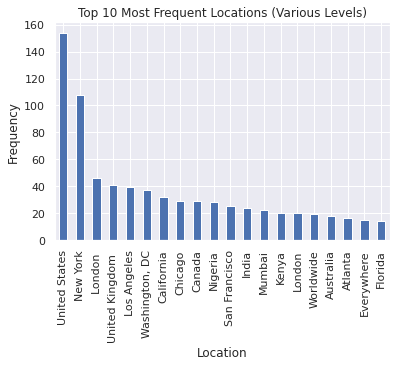

In [ ]:
# Top 20 most frequent locations
df_k = df_eda['location']
al = df_k.value_counts()[:20].plot(kind = 'bar', title = 'Top 10 Most Frequent Locations (Various Levels)')

al.set_ylabel("Frequency")
al.set_xlabel("Location")

print("US located tweets dominate that data sets. There are also many worldwide/everywhere present locations.")



# Feature: Tweets

In [ ]:
count = training_data['text'].str.split().apply(len).value_counts()
count.index = count.index.astype(str)
count.sort_index(inplace=True)
a = count
a = a.sort_values(ascending=True)

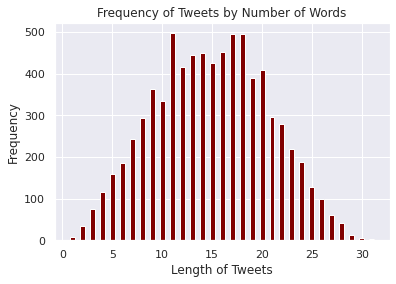

In [ ]:
import matplotlib.pyplot as plt

aa= a.to_frame()
aa['words'] = aa.index

aa['words'] = aa['words'].astype(int)

aa = aa.sort_values(by=['words'])

plt.bar(aa['words'], aa['text'], color ='maroon', width = 0.5)

plt.xlabel("Length of Tweets")
plt.ylabel("Frequency")
plt.title("Frequency of Tweets by Number of Words")
plt.show()


##### Frequency of Words in tweets

In [ ]:
#uncleaned tweets
df_text = training_data.copy()

count_input = df_text.text.str.split(expand=True).stack().value_counts()
count_1 = count_input.copy()

count_1 = pd.DataFrame(count_1)
count_1['Frequency'] = count_1[0]
count_1['Word'] = count_1.index
count = count_1[['Frequency', 'Word']]

count.head(20)

Frequency  Word
the        2575   the
a          1845     a
to         1805    to
in         1757    in
of         1722    of
and        1302   and
I          1197     I
for         820   for
is          814    is
on          773    on
-           763     -
you         632   you
The         552   The
my          549    my
with        508  with
that        492  that
at          485    at
by          469    by
it          433    it
from        372  from

In [ ]:
#cleaning stop words

# Import stopwords with nltk.
import nltk.corpus

nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

#cleaning stop words (some)
from nltk.corpus import stopwords
stop = set(stopwords.words("english"))

pos_tweets =  df_text['text'].squeeze().tolist()

test = pd.DataFrame(pos_tweets)
test[1]  = 'positive'



test.columns = ["tweet","class"]

# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
test['tweet_without_stopwords'] = test['tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

#words frequency without some of the stop words

count_input = test.tweet_without_stopwords.str.split(expand=True).stack().value_counts()
count_1 = count_input.copy()

count_1 = pd.DataFrame(count_1)
count_1['Frequency'] = count_1[0]
count_1['Word'] = count_1.index
count = count_1[['Frequency', 'Word']]

count.head(10)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Frequency   Word
I           1197      I
-            763      -
The          552    The
like         318   like
&amp;        295  &amp;
A            290      A
I'm          225    I'm
??           214     ??
via          208    via
get          183    get

#### Test

In [ ]:
test_data.shape

(3263, 3)

In [ ]:
test_data.head()

keyword location                                               text
0     NaN      NaN                 Just happened a terrible car crash
1     NaN      NaN  Heard about #earthquake is different cities, s...
2     NaN      NaN  there is a forest fire at spot pond, geese are...
3     NaN      NaN           Apocalypse lighting. #Spokane #wildfires
4     NaN      NaN      Typhoon Soudelor kills 28 in China and Taiwan

##3. Model **Analysis**

###3.1. SetUp() without using custom_stopwords



Custom stopwords are the words that occur in very high frequency in the tweets. As such, this is adding more noise than information. Deciding a list of `custom_stopwords` is a subjective decision and mostly stems from your understanding of the dataset. 

For example, in this dataset, words like 'fire', 'evacuate', 'died', 'flood' etc. are very obvious, since we are working on a dataset with disaster tweets.

In the section 3.1., we will setup our pycaret environment without using the stopwords, and compare the performance of the model when we use stopwords in the section 3.2.

In [ ]:
# sampling the data to select only 1500 documents
training_data = training_data.sample(1500, random_state=786).reset_index(drop=True)
training_data.shape

(1500, 4)

In [ ]:
from pycaret.nlp import *
#setup without using custom stopwords
exp_nlp101 = setup(training_data, target ='text', session_id = 123)

INFO:logs:setup() succesfully completed......................................


We are going to create a topic model from our dataset. There are 5 topic models for NLP supported by pycaret:
1. **Latent Dirichlet Allocation** ('lda'): In this, observations (e.g., words) are collected into documents, and each word's presence is attributable to one of the document's topics. 
2. **Latent Semantic Indexing** ('lsi'):  A method of analyzing a set of documents in order to discover statistical co-occurrences of words that appear together which then give insights into the topics of those words and documents.
3. **Hierarchical Dirichlet Process** ('hdp'): A nonparametric Bayesian approach to clustering grouped data.
4. **Random Projection** ('rp'): A technique used to reduce the dimensionality of a set of points which lie in Euclidean space. Random projection methods are known for their power, simplicity, and low error rates when compared to other methods.
5. **Non-Negative Matrix Factorization** ('nmf'): The analysis of high dimensional data as it automatically extracts sparse and meaningful features from a set of nonnegative data vectors.

In [ ]:
lda1 = create_model(model='lda', num_topics = 2, multi_core=True)

INFO:logs:LdaModel(num_terms=3463, num_topics=2, decay=0.5, chunksize=100)
INFO:logs:create_model() succesfully completed......................................


In [ ]:
lsi = create_model(model='lsi', num_topics = 2, multi_core=True)


INFO:logs:LsiModel(num_terms=3463, num_topics=2, decay=1.0, chunksize=20000)
INFO:logs:create_model() succesfully completed......................................


In [ ]:
hdp = create_model(model='hdp', num_topics = 2, multi_core=True)


INFO:logs:<gensim.models.hdpmodel.HdpModel object at 0x7f5b28beb890>
INFO:logs:create_model() succesfully completed......................................


In [ ]:
rp = create_model(model='rp', num_topics = 2, multi_core=True)


INFO:logs:RpModel(num_terms=3463, num_topics=2)
INFO:logs:create_model() succesfully completed......................................


In [ ]:
nmf = create_model(model='nmf', num_topics = 2, multi_core=True)


INFO:logs:NMF(alpha=0.0, beta_loss='frobenius', init='nndsvd', l1_ratio=0.0, max_iter=200,
    n_components=2, random_state=123, shuffle=False, solver='cd', tol=0.0001,
    verbose=0)
INFO:logs:create_model() succesfully completed......................................


In [ ]:
print(lda1)


LdaModel(num_terms=3463, num_topics=2, decay=0.5, chunksize=100)


In [ ]:
print(lsi)


LsiModel(num_terms=3463, num_topics=2, decay=1.0, chunksize=20000)


In [ ]:
print(hdp)


In [ ]:
print(rp)


RpModel(num_terms=3463, num_topics=2)


In [ ]:
print(nmf)

NMF(alpha=0.0, beta_loss='frobenius', init='nndsvd', l1_ratio=0.0, max_iter=200,
    n_components=2, random_state=123, shuffle=False, solver='cd', tol=0.0001,
    verbose=0)


Now that we have created a topic model, we would like to assign the topic proportions to our dataset to analyze the results. We will achieve this by using `assign_model()` function.

In [ ]:
lda1_results = assign_model(lda1)
lda1_results

INFO:logs:(1500, 8)
INFO:logs:assign_model() succesfully completed......................................


keyword                   location  \
0                    army                        NaN   
1               explosion              Kauai, Hawaii   
2                    riot                Cardiff, UK   
3                survived                          ?   
4                    hail                    Calgary   
...                   ...                        ...   
1495             injuries            Georgia, U.S.A.   
1496             upheaval                     Oregon   
1497           armageddon  California, United States   
1498  airplane%20accident                     Israel   
1499                wreck              United States   

                                                   text  target   Topic_0  \
0     direction pick http qeblokeve directioner http...       0  0.056957   
1     government concern population explosion popula...       0  0.076084   
2                                  piprhys predict riot       1  0.871814   
3     instead survive shot exactly know flee scene p...       1  0.426393   
4                              weathernetwork come hail       1  0.873170   
...                                                 ...     ...       ...   
1495         still serious injury glad police terminate       1  0.922269   
1496                          look state action year co       0  0.099550   
1497            pbban temporary avysss flag fast reason       0  0.079695   
1498                                  airplane accident       1  0.819712   
1499  amazondeal skylander trap team character pack ...       0  0.731087   

       Topic_1 Dominant_Topic  Perc_Dominant_Topic  
0     0.943043        Topic 1                 0.94  
1     0.923916        Topic 1                 0.92  
2     0.128186        Topic 0                 0.87  
3     0.573606        Topic 1                 0.57  
4     0.126830        Topic 0                 0.87  
...        ...            ...                  ...  
1495  0.077731        Topic 0                 0.92  
1496  0.900450        Topic 1                 0.90  
1497  0.920305        Topic 1                 0.92  
1498  0.180288        Topic 0                 0.82  
1499  0.268913        Topic 0                 0.73  

[1500 rows x 8 columns]

Now, we have 2 additional columns added to the dataframe. 'text' column is the tweets after all pre-processing. 

Topic_0 ... Topic_1 are the topic proportions and represents the distribution of topics for each document. 

We have experimented with finding the best number of topics and we have decided that 2 topics will give us the highest possible accuracies for our model. 

`Dominant_Topic` is the topic number with highest proportion and `Perc_Dominant_Topic` is the percentage of dominant topic over 1.0.

In [ ]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


colab mode needs to be enabled for plots to show up visually. 

In [ ]:
plot_model(lda1, plot = 'frequency') # Plotting word frequency

INFO:logs:Initializing plot_model()
INFO:logs:plot_model(model=LdaModel(num_terms=3463, num_topics=2, decay=0.5, chunksize=100), plot=frequency, topic_num=None, save=False, system=True)
INFO:logs:Topic selected. topic_num : Topic 0
INFO:logs:Checking exceptions
INFO:logs:Importing libraries


INFO:logs:save_param set to False
INFO:logs:plot type: frequency
INFO:logs:Rendering Visual
INFO:logs:SubProcess assign_model() called ==================================
INFO:logs:Initializing assign_model()
INFO:logs:assign_model(model=LdaModel(num_terms=3463, num_topics=2, decay=0.5, chunksize=100), verbose=False)
INFO:logs:Determining model type
INFO:logs:model type: lda
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor
INFO:logs:(1500, 8)
INFO:logs:assign_model() succesfully completed......................................
INFO:logs:SubProcess assign_model() end ==================================
INFO:logs:Fitting CountVectorizer()


INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


Here we see, `co` and `http` occur most frequently, which can be outliers. We will include these two words as a part of custom stopwords when we create next LDA model.

In [ ]:
plot_model(lda1, plot = 'topic_distribution') # Plotting topic distribution

INFO:logs:Initializing plot_model()
INFO:logs:plot_model(model=LdaModel(num_terms=3463, num_topics=2, decay=0.5, chunksize=100), plot=topic_distribution, topic_num=None, save=False, system=True)
INFO:logs:Topic selected. topic_num : Topic 0
INFO:logs:Checking exceptions
INFO:logs:Importing libraries


INFO:logs:save_param set to False
INFO:logs:plot type: topic_distribution
INFO:logs:SubProcess assign_model() called ==================================
INFO:logs:Initializing assign_model()
INFO:logs:assign_model(model=LdaModel(num_terms=3463, num_topics=2, decay=0.5, chunksize=100), verbose=False)
INFO:logs:Determining model type
INFO:logs:model type: lda
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor
INFO:logs:(1500, 8)
INFO:logs:assign_model() succesfully completed......................................
INFO:logs:SubProcess assign_model() end ==================================
INFO:logs:Sorting Dataframe
INFO:logs:Rendering Visual


INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
save_model(lda1,'Final LDA1 Model 11Nov2022')

`lda1` is the model we created without using custom stopwords. Next we will try creating another LDA model using our custom stopwords. 

###3.2. SetUp() using custom_stopwords

In this section, we will use `custom_stopwords` that will occur frequently in our tweets. Topic Modeling is very iterative machine learning task, finding the right list of custom stopwords is only possible after several iterations.

In [ ]:
training_data.shape

(7613, 5)

In [ ]:
exp_nlp102 = setup(data = training_data, target = 'text', session_id = 456,
                   custom_stopwords = ['co','http', 'go' 'get'],
                   log_experiment = True, experiment_name = 'disastertweets')

INFO:logs:setup() succesfully completed......................................


In [ ]:
lda2 = create_model(model='lda', num_topics = 2, multi_core=True)

In [ ]:
lda2_results = assign_model(lda2)
lda2_results

INFO:logs:(1500, 8)
INFO:logs:assign_model() succesfully completed......................................


keyword                   location  \
0                    army                        NaN   
1               explosion              Kauai, Hawaii   
2                    riot                Cardiff, UK   
3                survived                          ?   
4                    hail                    Calgary   
...                   ...                        ...   
1495             injuries            Georgia, U.S.A.   
1496             upheaval                     Oregon   
1497           armageddon  California, United States   
1498  airplane%20accident                     Israel   
1499                wreck              United States   

                                                   text  target   Topic_0  \
0                  direction pick qeblokeve directioner       0  0.893527   
1     government concern population explosion popula...       0  0.076808   
2                                  piprhys predict riot       1  0.870253   
3     instead survive shot exactly know flee scene p...       1  0.192890   
4                              weathernetwork come hail       1  0.166864   
...                                                 ...     ...       ...   
1495         still serious injury glad police terminate       1  0.080401   
1496                             look state action year       0  0.116013   
1497            pbban temporary avysss flag fast reason       0  0.927237   
1498                                  airplane accident       1  0.820605   
1499  amazondeal skylander trap team character sale ...       0  0.935799   

       Topic_1 Dominant_Topic  Perc_Dominant_Topic  
0     0.106473        Topic 0                 0.89  
1     0.923192        Topic 1                 0.92  
2     0.129747        Topic 0                 0.87  
3     0.807110        Topic 1                 0.81  
4     0.833136        Topic 1                 0.83  
...        ...            ...                  ...  
1495  0.919599        Topic 1                 0.92  
1496  0.883987        Topic 1                 0.88  
1497  0.072763        Topic 0                 0.93  
1498  0.179395        Topic 0                 0.82  
1499  0.064201        Topic 0                 0.94  

[1500 rows x 8 columns]

In [ ]:
plot_model(lda2, plot = 'frequency')

INFO:logs:Initializing plot_model()
INFO:logs:plot_model(model=LdaModel(num_terms=3240, num_topics=2, decay=0.5, chunksize=100), plot=frequency, topic_num=None, save=False, system=True)
INFO:logs:Topic selected. topic_num : Topic 0
INFO:logs:Checking exceptions
INFO:logs:Importing libraries


INFO:logs:save_param set to False
INFO:logs:plot type: frequency
INFO:logs:Rendering Visual
INFO:logs:SubProcess assign_model() called ==================================
INFO:logs:Initializing assign_model()
INFO:logs:assign_model(model=LdaModel(num_terms=3240, num_topics=2, decay=0.5, chunksize=100), verbose=False)
INFO:logs:Determining model type
INFO:logs:model type: lda
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor
INFO:logs:(1500, 8)
INFO:logs:assign_model() succesfully completed......................................
INFO:logs:SubProcess assign_model() end ==================================
INFO:logs:Fitting CountVectorizer()


INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


Here, we see that afer removing stop words, word count distribution is much more spread out evenly among words in tweets. 

In [ ]:
plot_model(lda2, plot = 'topic_distribution')

INFO:logs:Initializing plot_model()
INFO:logs:plot_model(model=LdaModel(num_terms=3240, num_topics=2, decay=0.5, chunksize=100), plot=topic_distribution, topic_num=None, save=False, system=True)
INFO:logs:Topic selected. topic_num : Topic 0
INFO:logs:Checking exceptions
INFO:logs:Importing libraries


INFO:logs:save_param set to False
INFO:logs:plot type: topic_distribution
INFO:logs:SubProcess assign_model() called ==================================
INFO:logs:Initializing assign_model()
INFO:logs:assign_model(model=LdaModel(num_terms=3240, num_topics=2, decay=0.5, chunksize=100), verbose=False)
INFO:logs:Determining model type
INFO:logs:model type: lda
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor
INFO:logs:(1500, 8)
INFO:logs:assign_model() succesfully completed......................................
INFO:logs:SubProcess assign_model() end ==================================
INFO:logs:Sorting Dataframe
INFO:logs:Rendering Visual


INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


It is important to identify if a trained model is objectively good or bad, as well have an ability to compare different models/methods. To do so, we require an objective measure for the quality of model. The approaches that are commonly used today as follows:

- **Eye Balling Models :** Look at Top N words, Topics / Documents etc. 
- **Intrinsic Evaluation Metrics:** Interpretability and semantics of model, such as topic coherence
- **Extrinsic Evaluation Metrics:** Is model good at performing predefined tasks, such as classification?
- **Human Judgements:** Does the topic model improves your understanding of the problem?


In this section, we will evaluate **coherence value of our topic model** using `tune_model()` function. Followed by extrinsic evaluation on number of topics in a topic model to optimize classifier that can predict whether *a tweet* is about a disaster or not using `status` column in the dataset.

**Topic Coherence** measures the score of a single topic by measuring the degree of semantic similarity between high scoring words in the topic. These measurements help distinguish between topics that are semantically interpretable topics, and topics that are artifacts of statistical inference. 

In the simplest term, the model with highest coherence score is the best model based on intrinsic evaluation criteria. 

In [ ]:
tuned_unsupervised = tune_model(model = 'lda', multi_core = True)

INFO:logs:Initializing tune_model()
INFO:logs:tune_model(model=lda, multi_core=True, supervised_target=None, estimator=None, optimize=None, custom_grid=None, auto_fe=True, fold=10, verbose=True)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


IntProgress(value=0, description='Processing: ', max=25)

Output()

INFO:logs:Importing libraries


INFO:logs:Objective : Unsupervised
INFO:logs:Defining model name
INFO:logs:Topic Model Name: Latent Dirichlet Allocation
INFO:logs:Defining supervised estimator
INFO:logs:Estimator: None
INFO:logs:Defining Optimizer
INFO:logs:Optimize: None
INFO:logs:Defining Tuning Grid
INFO:logs:Pre-defined Grid used


\
                                                 
Initiated  . . . . . . . . . . . . . . . . . .   
Status     . . . . . . . . . . . . . . . . . .   
Step       . . . . . . . . . . . . . . . . . .   

                                                 
                                                 
Initiated                              05:16:41  
Status                               Finalizing  
Step       Evaluating Coherence With 400 Topics

INFO:logs:Fitting Model with num_topics = 2
INFO:logs:SubProcess create_model() called ==================================
INFO:logs:Initializing create_model()
INFO:logs:create_model(model=lda, multi_core=True, num_topics=2, verbose=False, system=True)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor
INFO:logs:Defining topic model
INFO:logs:Model: Latent Dirichlet Allocation
INFO:logs:Defining num_topics parameter
INFO:logs:num_topics set to: 2
INFO:logs:LDA multi_core enabled
INFO:logs:LdaMulticore imported successfully
INFO:logs:LdaMulticore trained successfully
INFO:logs:Creating Dashboard Logs
INFO:logs:LdaModel(num_terms=3240, num_topics=2, decay=0.5, chunksize=100)
INFO:logs:create_model() succesfully completed......................................
INFO:logs:SubProcess create_model() end ==================================
INFO:logs:SubProcess assign_model() called ==================================
INFO:logs:Initializing assign_mode

INFO:logs:Visual Rendered Successfully
INFO:logs:LdaModel(num_terms=3240, num_topics=8, decay=0.5, chunksize=100)
INFO:logs:tune_model() succesfully completed......................................


Best Model: Latent Dirichlet Allocation | # Topics: 8 | Coherence: 0.6126


For our unsupervised lda model, the `Accuracy` is optimized when `num_topics` are set to `8`. 

In [ ]:
tuned_classification = tune_model(model = 'lda', multi_core = True, supervised_target = 'target')

INFO:logs:Initializing tune_model()
INFO:logs:tune_model(model=lda, multi_core=True, supervised_target=target, estimator=None, optimize=None, custom_grid=None, auto_fe=True, fold=10, verbose=True)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


IntProgress(value=0, description='Processing: ', max=25)

Output()

INFO:logs:Importing libraries


INFO:logs:Objective : Classification
INFO:logs:Defining model name
INFO:logs:Topic Model Name: Latent Dirichlet Allocation
INFO:logs:Defining supervised estimator
INFO:logs:Estimator: lr
INFO:logs:Defining Optimizer
INFO:logs:Optimize: Accuracy
INFO:logs:Problem : Supervised
INFO:logs:auto_fe param set to True


\
                                                 
Initiated  . . . . . . . . . . . . . . . . . .   
Status     . . . . . . . . . . . . . . . . . .   
Step       . . . . . . . . . . . . . . . . . .   

                                                  
                                                  
Initiated                               05:23:08  
Status                                Finalizing  
Step       Evaluating Classifier With 400 Topics

INFO:logs:Extracting Polarity
INFO:logs:Extracting Subjectivity
INFO:logs:Extracting Wordcount
INFO:logs:Defining Tuning Grid
INFO:logs:Pre-defined Grid used
INFO:logs:Fitting Model with num_topics = 2
INFO:logs:SubProcess create_model() called ==================================
INFO:logs:Initializing create_model()
INFO:logs:create_model(model=lda, multi_core=True, num_topics=2, verbose=False, system=True)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor
INFO:logs:Defining topic model
INFO:logs:Model: Latent Dirichlet Allocation
INFO:logs:Defining num_topics parameter
INFO:logs:num_topics set to: 2
INFO:logs:LDA multi_core enabled
INFO:logs:LdaMulticore imported successfully
INFO:logs:LdaMulticore trained successfully
INFO:logs:Creating Dashboard Logs
INFO:logs:LdaModel(num_terms=3240, num_topics=2, decay=0.5, chunksize=100)
INFO:logs:create_model() succesfully completed......................................
INFO:logs:SubProcess create_m

INFO:logs:Visual Rendered Successfully
INFO:logs:LdaModel(num_terms=3240, num_topics=2, decay=0.5, chunksize=100)
INFO:logs:tune_model() succesfully completed......................................


Best Model: Latent Dirichlet Allocation | # Topics: 2 | Accuracy : 0.6902


For our supervised lda model, the `Accuracy` is optimized when `num_topics` are set to `2`. 

In [ ]:
save_model(lda2,'Final LDA2 Model 11Nov2022')

INFO:logs:Initializing save_model()
INFO:logs:save_model(model=LdaModel(num_terms=3240, num_topics=2, decay=0.5, chunksize=100), model_name=Final LDA2 Model 11Nov2022, verbose=True)
INFO:logs:LdaModel(num_terms=3240, num_topics=2, decay=0.5, chunksize=100)
INFO:logs:save_model() succesfully completed......................................


Model Succesfully Saved


(<gensim.models.ldamulticore.LdaMulticore at 0x7fccd6b0aa90>,
 'Final LDA2 Model 11Nov2022.pkl')

###3.3. Making prediction using classification model

We planned to use classification model as a ML model for our web app to make predictions on tweets. We will pick top 3 models with highest accuracies, then blend them to create more stable model. 

In [ ]:
import numpy as np

# Importing PyCaret's classification module
from pycaret.classification import *

In [ ]:
# sampling the data to select only 1500 documents
training_data.shape

(1500, 4)

We will take the sample of original training data to speed up the training process, albeit lost in some accuracy. 

In [ ]:
exp_clf101 = setup(data = training_data, target = 'target', session_id=789,
                  normalize = True, transformation = True, ignore_low_variance = True,
                  remove_multicollinearity = True, multicollinearity_threshold = 0.95,
                  log_experiment = False, experiment_name = 'tweetprediction', use_gpu=True) 

Description            Value
0                               session_id              789
1                                   Target           target
2                              Target Type           Binary
3                            Label Encoded             None
4                            Original Data        (1500, 4)
5                           Missing Values             True
6                         Numeric Features                0
7                     Categorical Features                3
8                         Ordinal Features            False
9                High Cardinality Features            False
10                 High Cardinality Method             None
11                   Transformed Train Set       (1049, 29)
12                    Transformed Test Set        (451, 29)
13                      Shuffle Train-Test             True
14                     Stratify Train-Test            False
15                          Fold Generator  StratifiedKFold
16                             Fold Number               10
17                                CPU Jobs               -1
18                                 Use GPU             True
19                          Log Experiment            False
20                         Experiment Name  tweetprediction
21                                     USI             49b6
22                         Imputation Type           simple
23          Iterative Imputation Iteration             None
24                         Numeric Imputer             mean
25      Iterative Imputation Numeric Model             None
26                     Categorical Imputer         constant
27  Iterative Imputation Categorical Model             None
28           Unknown Categoricals Handling   least_frequent
29                               Normalize             True
30                        Normalize Method           zscore
31                          Transformation             True
32                   Transformation Method      yeo-johnson
33                                     PCA            False
34                              PCA Method             None
35                          PCA Components             None
36                     Ignore Low Variance             True
37                     Combine Rare Levels            False
38                    Rare Level Threshold             None
39                         Numeric Binning            False
40                         Remove Outliers            False
41                      Outliers Threshold             None
42                Remove Multicollinearity             True
43             Multicollinearity Threshold             0.95
44             Remove Perfect Collinearity             True
45                              Clustering            False
46                    Clustering Iteration             None
47                     Polynomial Features            False
48                       Polynomial Degree             None
49                    Trignometry Features            False
50                    Polynomial Threshold             None
51                          Group Features            False
52                       Feature Selection            False
53                Feature Selection Method          classic
54            Features Selection Threshold             None
55                     Feature Interaction            False
56                           Feature Ratio            False
57                   Interaction Threshold             None
58                           Fix Imbalance            False
59                    Fix Imbalance Method            SMOTE

INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='target',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strat...
                ('dummy', Dummify(target='target')),
                ('fix_perfect', Remove_100(target='target')),
                ('clean_names', Clean_Colum_Names()),
     

In [ ]:
compare_models(sort = 'Accuracy', n_select = 3)

Model  Accuracy     AUC  Recall   Prec.  \
ada                  Ada Boost Classifier    0.6330  0.6077  0.2394  0.7545   
lda          Linear Discriminant Analysis    0.6330  0.6080  0.2394  0.7545   
lr                    Logistic Regression    0.6320  0.6005  0.2351  0.7555   
ridge                    Ridge Classifier    0.6311  0.0000  0.2351  0.7519   
nb                            Naive Bayes    0.6272  0.5989  0.2220  0.7505   
rf               Random Forest Classifier    0.6215  0.5706  0.2176  0.7246   
gbc          Gradient Boosting Classifier    0.6158  0.5893  0.1894  0.7410   
dt               Decision Tree Classifier    0.6149  0.5718  0.1958  0.7241   
et                 Extra Trees Classifier    0.6149  0.5728  0.1958  0.7241   
qda       Quadratic Discriminant Analysis    0.6063  0.5695  0.1437  0.8267   
svm                   SVM - Linear Kernel    0.5911  0.0000  0.4090  0.6549   
lightgbm  Light Gradient Boosting Machine    0.5643  0.4592  0.0065  0.3000   
dummy                    Dummy Classifier    0.5624  0.5000  0.0000  0.0000   
knn                K Neighbors Classifier    0.5234  0.5459  0.5508  0.4721   

              F1   Kappa     MCC  TT (Sec)  
ada       0.3589  0.1925  0.2547     0.128  
lda       0.3589  0.1925  0.2547     0.029  
lr        0.3542  0.1898  0.2529     0.037  
ridge     0.3535  0.1879  0.2502     0.036  
nb        0.3379  0.1778  0.2414     0.014  
rf        0.3303  0.1657  0.2235     0.985  
gbc       0.2962  0.1486  0.2138     0.125  
dt        0.3013  0.1479  0.2075     0.016  
et        0.3013  0.1479  0.2075     0.939  
qda       0.2347  0.1202  0.2059     0.024  
svm       0.4194  0.1493  0.2082     0.016  
lightgbm  0.0128  0.0054  0.0247     0.034  
dummy     0.0000  0.0000  0.0000     0.008  
knn       0.4807  0.0528  0.0594     0.336

INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:[AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=789), LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001), LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=789, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)]
INFO:logs:compare_models() succesfully completed......................................


[AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                    n_estimators=50, random_state=789),
 LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                            solver='svd', store_covariance=False, tol=0.0001),
 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=1000,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=789, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False)]

Based on the result from `compare_model()`, we see that `lda`, `ada` and `lr` are the top 3 models with highest accuracies on our training data. 

We will now create each of separate models and blend them to get highest accuracy possible. 

In [ ]:
lda = create_model('lda')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.6667  0.6304  0.2826  0.8667  0.4262  0.2687  0.3526
1       0.6381  0.6608  0.2391  0.7857  0.3667  0.2039  0.2748
2       0.6000  0.6056  0.2391  0.6111  0.3438  0.1291  0.1586
3       0.6762  0.6172  0.3696  0.7727  0.5000  0.3022  0.3472
4       0.6667  0.6955  0.3043  0.8235  0.4444  0.2724  0.3414
5       0.6095  0.5199  0.1522  0.7778  0.2545  0.1298  0.2096
6       0.6476  0.6514  0.2609  0.8000  0.3934  0.2269  0.2978
7       0.6381  0.5560  0.2391  0.7857  0.3667  0.2039  0.2748
8       0.5810  0.5695  0.1739  0.5714  0.2667  0.0782  0.1054
9       0.6058  0.5733  0.1333  0.7500  0.2264  0.1102  0.1849
Mean    0.6330  0.6080  0.2394  0.7545  0.3589  0.1925  0.2547
Std     0.0308  0.0511  0.0683  0.0874  0.0838  0.0731  0.0817

INFO:logs:create_model_container: 1
INFO:logs:master_model_container: 1
INFO:logs:display_container: 2
INFO:logs:LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)
INFO:logs:create_model() succesfully completed......................................


In [ ]:
ada = create_model('ada')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.6667  0.6304  0.2826  0.8667  0.4262  0.2687  0.3526
1       0.6381  0.6605  0.2391  0.7857  0.3667  0.2039  0.2748
2       0.6000  0.6037  0.2391  0.6111  0.3438  0.1291  0.1586
3       0.6762  0.6172  0.3696  0.7727  0.5000  0.3022  0.3472
4       0.6667  0.6955  0.3043  0.8235  0.4444  0.2724  0.3414
5       0.6095  0.5203  0.1522  0.7778  0.2545  0.1298  0.2096
6       0.6476  0.6514  0.2609  0.8000  0.3934  0.2269  0.2978
7       0.6381  0.5556  0.2391  0.7857  0.3667  0.2039  0.2748
8       0.5810  0.5691  0.1739  0.5714  0.2667  0.0782  0.1054
9       0.6058  0.5733  0.1333  0.7500  0.2264  0.1102  0.1849
Mean    0.6330  0.6077  0.2394  0.7545  0.3589  0.1925  0.2547
Std     0.0308  0.0510  0.0683  0.0874  0.0838  0.0731  0.0817

INFO:logs:create_model_container: 2
INFO:logs:master_model_container: 2
INFO:logs:display_container: 3
INFO:logs:AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=789)
INFO:logs:create_model() succesfully completed......................................


In [ ]:
lr = create_model("lr")

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.6571  0.6304  0.2609  0.8571  0.4000  0.2458  0.3313
1       0.6286  0.6594  0.2174  0.7692  0.3390  0.1808  0.2509
2       0.6000  0.6034  0.2391  0.6111  0.3438  0.1291  0.1586
3       0.6857  0.6146  0.3696  0.8095  0.5075  0.3210  0.3743
4       0.6667  0.6958  0.3043  0.8235  0.4444  0.2724  0.3414
5       0.6095  0.5195  0.1522  0.7778  0.2545  0.1298  0.2096
6       0.6476  0.5822  0.2609  0.8000  0.3934  0.2269  0.2978
7       0.6381  0.5567  0.2391  0.7857  0.3667  0.2039  0.2748
8       0.5810  0.5691  0.1739  0.5714  0.2667  0.0782  0.1054
9       0.6058  0.5736  0.1333  0.7500  0.2264  0.1102  0.1849
Mean    0.6320  0.6005  0.2351  0.7555  0.3542  0.1898  0.2529
Std     0.0314  0.0492  0.0675  0.0873  0.0835  0.0741  0.0827

INFO:logs:create_model_container: 3
INFO:logs:master_model_container: 3
INFO:logs:display_container: 4
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=789, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [ ]:
blendedmodels = blend_models(estimator_list = [ada, lda, lr],
                              fold = 8, choose_better = True, optimize = 'Accuracy',
                              method = 'soft')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.6515  0.6336  0.2759  0.8000  0.4103  0.2387  0.3070
1       0.5954  0.6222  0.1724  0.6667  0.2740  0.1125  0.1621
2       0.6412  0.6219  0.3276  0.7037  0.4471  0.2307  0.2677
3       0.6718  0.6635  0.2982  0.8500  0.4416  0.2785  0.3552
4       0.6107  0.5509  0.1754  0.7143  0.2817  0.1329  0.1948
5       0.6183  0.5642  0.1754  0.7692  0.2857  0.1480  0.2237
6       0.6031  0.6258  0.1754  0.6667  0.2778  0.1178  0.1680
7       0.6107  0.5599  0.1579  0.7500  0.2609  0.1291  0.2017
Mean    0.6253  0.6052  0.2198  0.7401  0.3349  0.1735  0.2350
Std     0.0249  0.0385  0.0641  0.0606  0.0769  0.0609  0.0646

INFO:logs:create_model_container: 7
INFO:logs:master_model_container: 7
INFO:logs:display_container: 5
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=789, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:blend_models() succesfully completed......................................


In [ ]:
tuned_blended_model = tune_model(blendedmodels,
                                fold = 5,
                                n_iter = 15,
                                optimize = 'Accuracy',
                                choose_better = True)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.6429  0.6341  0.2391  0.8148  0.3697  0.2134  0.2916
1       0.6381  0.6087  0.3043  0.7000  0.4242  0.2161  0.2561
2       0.6476  0.6168  0.2500  0.8214  0.3833  0.2249  0.3030
3       0.6429  0.5846  0.2500  0.7931  0.3802  0.2154  0.2864
4       0.5981  0.5707  0.1648  0.6522  0.2632  0.1061  0.1537
Mean    0.6339  0.6030  0.2417  0.7563  0.3641  0.1952  0.2582
Std     0.0182  0.0227  0.0447  0.0679  0.0538  0.0447  0.0545

INFO:logs:create_model_container: 9
INFO:logs:master_model_container: 9
INFO:logs:display_container: 6
INFO:logs:LogisticRegression(C=4.389, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=789, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


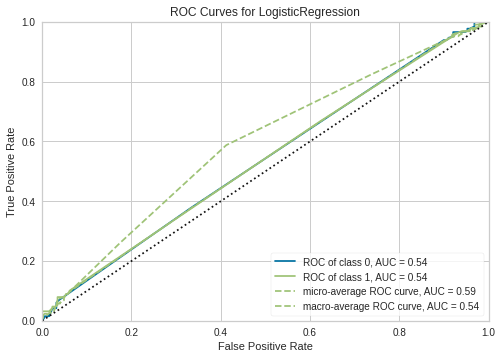

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_blended_model, plot = 'auc')

* **AUC Analysis:** AUC is 0.54.

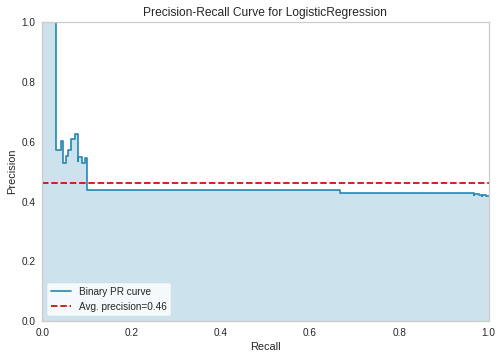

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_blended_model, plot = 'pr')

* **Precision-Recall Analysis:** Average Precision is 0.46.

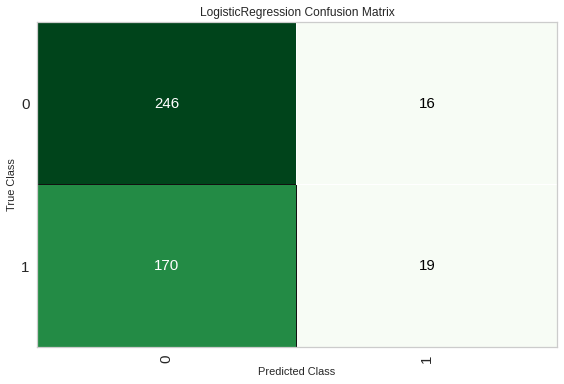

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_blended_model, plot = 'confusion_matrix')

* **Confusion Matrix Analysis:** We can see that our model has fairly good prediction for false positives (meaning it can predict that a tweet is not a disaster tweet). 

#### Our model unfortunately has a large number of false negatives, which means it predicted that a tweet is not a disaster tweet, when in fact, it is a disaster tweet. 

In [ ]:
predict_model(tuned_blended_model)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LogisticRegression(C=4.389, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=789, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


Model  Accuracy    AUC  Recall   Prec.      F1   Kappa  \
0  Logistic Regression    0.5876  0.538  0.1005  0.5429  0.1696  0.0445   

      MCC  
0  0.0728

keyword_airplane%20accident  keyword_attack  keyword_bombed  \
0                            0.0             0.0             0.0   
1                            0.0             0.0             0.0   
2                            0.0             0.0             0.0   
3                            0.0             0.0             0.0   
4                            0.0             0.0             0.0   
..                           ...             ...             ...   
446                          0.0             0.0             0.0   
447                          0.0             0.0             0.0   
448                          0.0             0.0             0.0   
449                          0.0             0.0             0.0   
450                          0.0             0.0             0.0   

     keyword_bombing  keyword_catastrophe  keyword_crush  keyword_demolish  \
0                0.0                  0.0            0.0               0.0   
1                0.0                  0.0            0.0               0.0   
2                0.0                  0.0            0.0               0.0   
3                0.0                  0.0            0.0               0.0   
4                0.0                  0.0            0.0               0.0   
..               ...                  ...            ...               ...   
446              0.0                  0.0            0.0               0.0   
447              0.0                  0.0            0.0               0.0   
448              0.0                  0.0            0.0               0.0   
449              0.0                  0.0            0.0               0.0   
450              0.0                  0.0            0.0               0.0   

     keyword_derailed  keyword_detonation  keyword_drown  ...  \
0                 0.0                 0.0            0.0  ...   
1                 0.0                 0.0            0.0  ...   
2                 0.0                 0.0            0.0  ...   
3                 0.0                 0.0            0.0  ...   
4                 0.0                 0.0            0.0  ...   
..                ...                 ...            ...  ...   
446               0.0                 0.0            0.0  ...   
447               0.0                 0.0            0.0  ...   
448               0.0                 0.0            1.0  ...   
449               0.0                 0.0            0.0  ...   
450               0.0                 0.0            0.0  ...   

     keyword_typhoon  keyword_upheaval  keyword_whirlwind  \
0                0.0               0.0                0.0   
1                0.0               0.0                0.0   
2                0.0               0.0                0.0   
3                0.0               0.0                0.0   
4                0.0               0.0                0.0   
..               ...               ...                ...   
446              0.0               0.0                0.0   
447              0.0               0.0                0.0   
448              0.0               0.0                0.0   
449              0.0               0.0                0.0   
450              0.0               0.0                0.0   

     keyword_wild%20fires  keyword_wounded  location_USA  \
0                     0.0              0.0           0.0   
1                     0.0              0.0           0.0   
2                     0.0              0.0           0.0   
3                     0.0              0.0           0.0   
4                     0.0              0.0           0.0   
..                    ...              ...           ...   
446                   0.0              0.0           0.0   
447                   0.0              0.0           0.0   
448                   0.0              0.0           0.0   
449                   0.0              0.0           0.0   
450                   0.0              0.0           0.0   

     location_no

The prediction made using the blended model shows the accuracy of 0.5876. 

In [ ]:
final_model = finalize_model(tuned_blended_model)

In [ ]:
save_model(final_model,'Final Model 11Nov2022')

We will now save the model to use as our ML model for backend of our webapp. 

In [ ]:
# Now we must treat test text data with PyCaret's NLP module
from pycaret.nlp import *
setup(test_data, target = 'text',session_id = 890)

In [ ]:
predictions = predict_model(final_model, data = lda2_results) # Using model to predict on test data

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LogisticRegression(C=4.389, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=789, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


Model  Accuracy     AUC  Recall   Prec.      F1   Kappa  \
0  Logistic Regression     0.624  0.6036  0.2052  0.7308  0.3205  0.1617   

      MCC  
0  0.2241

When we used our final model and used `LDA` data to make prediction, our accuracy increased to 0.624. 

In [ ]:
# Seeing predictions dataframe
predictions

keyword                   location  \
0                    army                        NaN   
1               explosion              Kauai, Hawaii   
2                    riot                Cardiff, UK   
3                survived                          ?   
4                    hail                    Calgary   
...                   ...                        ...   
1495             injuries            Georgia, U.S.A.   
1496             upheaval                     Oregon   
1497           armageddon  California, United States   
1498  airplane%20accident                     Israel   
1499                wreck              United States   

                                                   text  target   Topic_0  \
0                  direction pick qeblokeve directioner       0  0.893527   
1     government concern population explosion popula...       0  0.076808   
2                                  piprhys predict riot       1  0.870253   
3     instead survive shot exactly know flee scene p...       1  0.192890   
4                              weathernetwork come hail       1  0.166864   
...                                                 ...     ...       ...   
1495         still serious injury glad police terminate       1  0.080401   
1496                             look state action year       0  0.116013   
1497            pbban temporary avysss flag fast reason       0  0.927237   
1498                                  airplane accident       1  0.820605   
1499  amazondeal skylander trap team character sale ...       0  0.935799   

       Topic_1 Dominant_Topic  Perc_Dominant_Topic  Label   Score  
0     0.106473        Topic 0                 0.89      0  0.5346  
1     0.923192        Topic 1                 0.92      0  0.5174  
2     0.129747        Topic 0                 0.87      0  0.5174  
3     0.807110        Topic 1                 0.81      0  0.5174  
4     0.833136        Topic 1                 0.83      0  0.5174  
...        ...            ...                  ...    ...     ...  
1495  0.919599        Topic 1                 0.92      0  0.5174  
1496  0.883987        Topic 1                 0.88      0  0.8179  
1497  0.072763        Topic 0                 0.93      0  0.5174  
1498  0.179395        Topic 0                 0.82      1  0.9391  
1499  0.064201        Topic 0                 0.94      0  0.5174  

[1500 rows x 10 columns]

In [ ]:
predictions['target'] = predictions['Label']

In [ ]:
input_dict = {'text': "I'm a happy boy!", 'keyword':"", 'location':""}
input_df = pd.DataFrame([input_dict])
predictions_df = predict_model(estimator=final_model, data=input_df)
predictions = predictions_df['Label'][0]
print(predictions)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LogisticRegression(C=4.389, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=789, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


0


Here we see the sample prediction on the tweet, 'I'm a happy boy!'. We get the correct prediction that this is not a disaster tweet. 

#4. **Conclusion**

Our goal was to predict Disaster Tweet with the help of Machine Learning techniques. If emergency response team can access a ML model that can quickly determine if a tweet implies disaster, they can quickly dispatch rescue team. With combined power of a NLP model and a Classification model, we were able to create a webapp that can predict whether a tweet is a disaster or not. 

We learnt a lot about the entire pipeline of NLP machine learning process. From framing a business problem to testing a new dataset to our ML model, through trial and error. We also learnt how to optimize our model through data preprocessing, parameter tuning and reducing the size of dataset by taking a sample for analysis and modelling. 

The Colab workspace kept crashing when we used the full dataset with 7500 samples. This was overcome by taking a sample of the dataset. Although this impacted the accuracy of our model, but the performance on Colab was much more stable. 

Our model has the limited accuracy of 64.4% and this can be attributed to a number of factors:
1. Missing features data
2. Smaller number of samples used for training our model
3. Tweet data with special symbols
4. Small number of features in the dataset

## What we learned from working on Assignment 3 NLP Project:
* **How to frame a machine learning business problem**
* **How to analyze and preprocess dataset**
* **Explore each feature and try to deduce the impact it might have on the prediction**
* **How to choose right number of topics for training our topic model**
* **Difference between Topic model and Classification model**
* **How to interpret plots produced by our ML model**
* **How to experiment with different parameter values that gives us the highest accuracy**
* **How to create web app to deploy our final ML model**
* **How to work collectively as a team**

#5. **Bibliography**

1. The 100-page Machine Learning Book by Andriy Burkov
2. A beginners guide to Latent Dirichlet Allocation https://towardsdatascience.com/latent-dirichlet-allocation-lda-9d1cd064ffa2
3. Pycaret NLP Turorials
4. Stackoverflow
5. LDA by Andrew Ng https://ai.stanford.edu/~ang/papers/nips01-lda.pdf